In [1]:
import numpy as np
import pandas as pd


In [2]:
data= pd.read_csv("C:\\Users\\vinay\\jio_ smartmart.csv")
data

,Product,Quantity Ordered,Price Each,price
0,USB-C Charging Cable,2,11.95,23.90
1,Bose SoundSport Headphones,1,99.99,99.99
2,Google Phone,1,600.00,600.00
3,Wired Headphones,1,11.99,11.99
4,Wired Headphones,1,11.99,11.99
...,...,...,...,...
495,USB-C Charging Cable,1,11.95,11.95
496,USB-C Charging Cable,1,11.95,11.95
497,Bose SoundSport Headphones,1,99.99,99.99
498,Lightning Charging Cable,2,14.95,29.90


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product           500 non-null    object 
 1   Quantity Ordered  500 non-null    int64  
 2   Price Each        500 non-null    float64
 3   price             500 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 15.8+ KB


In [4]:
data.isnull().any()

Product             False
Quantity Ordered    False
Price Each          False
price               False
dtype: bool

In [5]:
data=data.dropna()

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product           500 non-null    object 
 1   Quantity Ordered  500 non-null    int64  
 2   Price Each        500 non-null    float64
 3   price             500 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 15.8+ KB


In [7]:
data.isnull().any()

Product             False
Quantity Ordered    False
Price Each          False
price               False
dtype: bool

In [8]:
data['Product'].unique()

array(['USB-C Charging Cable', 'Bose SoundSport Headphones',
       'Google Phone', 'Wired Headphones', 'Macbook Pro Laptop',
       'Lightning Charging Cable', '27in 4K Gaming Monitor',
       'AA Batteries (4-pack)', 'Apple Airpods Headphones',
       'AAA Batteries (4-pack)', 'iPhone', 'Flatscreen TV',
       '27in FHD Monitor', '20in Monitor', 'LG Dryer', 'ThinkPad Laptop',
       'Vareebadd Phone', 'LG Washing Machine', '34in Ultrawide Monitor'],
      dtype=object)

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
le = LabelEncoder()
data['Price Each'] = le.fit_transform(data['Price Each'])
data


,Product,Quantity Ordered,Price Each,price
0,USB-C Charging Cable,2,2,23.90
1,Bose SoundSport Headphones,1,5,99.99
2,Google Phone,1,13,600.00
3,Wired Headphones,1,3,11.99
4,Wired Headphones,1,3,11.99
...,...,...,...,...
495,USB-C Charging Cable,1,2,11.95
496,USB-C Charging Cable,1,2,11.95
497,Bose SoundSport Headphones,1,5,99.99
498,Lightning Charging Cable,2,4,29.90


In [11]:
le = LabelEncoder()
data['price'] = le.fit_transform(data['price'])
data


,Product,Quantity Ordered,Price Each,price
0,USB-C Charging Cable,2,2,9
1,Bose SoundSport Headphones,1,5,15
2,Google Phone,1,13,25
3,Wired Headphones,1,3,7
4,Wired Headphones,1,3,7
...,...,...,...,...
495,USB-C Charging Cable,1,2,6
496,USB-C Charging Cable,1,2,6
497,Bose SoundSport Headphones,1,5,15
498,Lightning Charging Cable,2,4,11


In [12]:
le = LabelEncoder()
data['Product'] = le.fit_transform(data['Product'])
data


,Product,Quantity Ordered,Price Each,price
0,15,2,2,9
1,7,1,5,15
2,9,1,13,25
3,17,1,3,7
4,17,1,3,7
...,...,...,...,...
495,15,1,2,6
496,15,1,2,6
497,7,1,5,15
498,12,2,4,11


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

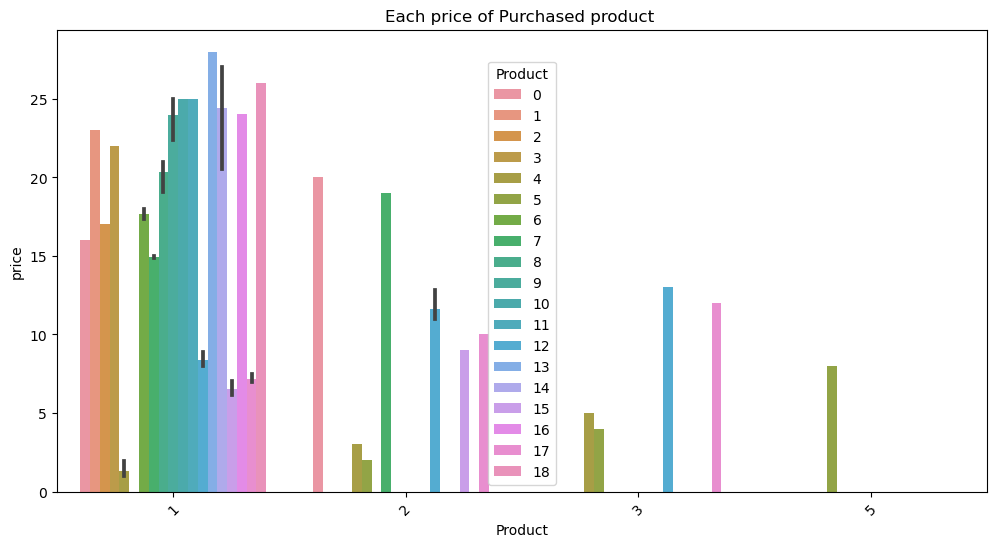

In [14]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Quantity Ordered', y='price', hue='Product', data=data)
# You can customize the plot further
plt.title('Each price of Purchased product ')
plt.xlabel('Product')
plt.ylabel('price')
plt.xticks(rotation=45) # Rotate x-axis labels for better readability
# Show the plot
plt.show()

In [15]:
#Execute Train-Test-Split Command and Verify

In [16]:
x = data[['Price Each', 'Quantity Ordered','Product']]
y = data['price']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=100)


In [17]:
x_train.shape

(350, 3)

In [18]:
x_test.shape


(150, 3)

In [19]:
y_train.shape

(350,)

In [20]:
y_test.shape


(150,)

In [21]:
#1) Linear Regressor (LR)

In [22]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [23]:
y_pred = model.predict(x_test)
y_pred.shape

(150,)

In [24]:
y_test # actual y

69     17
29     15
471    18
344     0
54     26
       ..
308     1
171    23
457     7
75      6
311     1
Name: price, Length: 150, dtype: int64

In [25]:
from sklearn.metrics import r2_score

In [26]:
r2 = r2_score(y_test, y_pred)
r2

0.9032558363897882

In [27]:
df = pd.DataFrame({'True Values': y_test, 'Predictions': y_pred})
df

,True Values,Predictions
69,17,14.986722
29,15,11.151970
471,18,16.732972
344,0,1.946834
54,26,27.526395
...,...,...
308,1,3.824719
171,23,22.419282
457,7,7.185583
75,6,5.386679


In [28]:
# Polynomial regression
from sklearn.preprocessing import PolynomialFeatures
degree = 2 # You can change this to the degree of polynomial you want
# Create polynomial features
poly_features = PolynomialFeatures(degree=degree)
x_train_poly = poly_features.fit_transform(x_train)
x_test_poly = poly_features.transform(x_test)
# Fit a polynomial regression model
poly_reg = LinearRegression()
poly_reg.fit(x_train_poly, y_train)

LinearRegression()

In [29]:
# Make predictions on the test set
y_pred = poly_reg.predict(x_test_poly)
y_pred

array([16.81745605, 12.4388665 , 18.46002012, -0.63344748, 24.97048252,
       25.06824254,  5.35569786, 16.81745605, -0.63344748,  4.6831787 ,
       21.96144286,  5.35569786,  2.26921388, 24.97048252, 26.72958218,
        4.6831787 , 21.96144286, 24.85143887, 20.02101433,  5.35569786,
        5.35569786, 12.4388665 , 24.97048252,  5.35569786,  5.35569786,
       10.15714762, 26.06466462, 23.60436491, 18.46002012,  1.66393632,
        5.35569786, 14.8626692 , 24.97048252,  5.35569786,  7.92177446,
       10.15714762, -0.63344748, 10.15714762, 18.46002012, 12.4388665 ,
       14.8626692 , 24.97048252,  5.35569786,  7.92177446,  4.6831787 ,
        5.35569786,  7.92177446, -0.63344748, -0.63344748, -0.63344748,
       -0.63344748,  7.92177446, -0.63344748,  5.35569786,  7.92177446,
       18.46002012, -0.63344748, 24.85143887, 21.96144286,  2.26921388,
       12.4388665 , -0.63344748, 10.15714762, 21.96144286, 23.60436491,
        5.35569786,  7.92177446, -0.63344748,  7.92177446, 12.43

In [30]:
from sklearn.metrics import r2_score, mean_squared_error
# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2:.2f}')
# Calculate RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'RMSE: {rmse:.2f}')


R-squared: 0.93
RMSE: 2.16


In [31]:
r2

0.9344263398130908

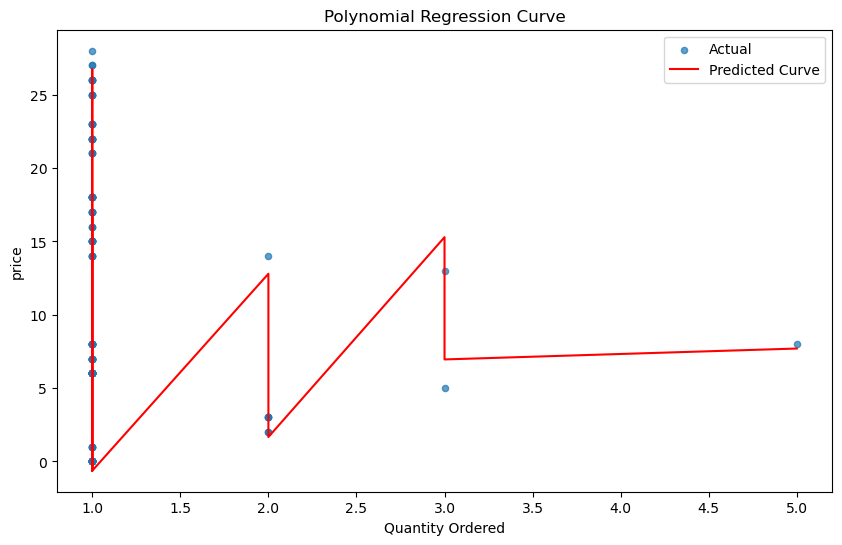

In [32]:
# Sort the X_test values for smoother curve plotting
sorted_indices = x_test['Quantity Ordered'].argsort()
x_test_sorted = x_test['Quantity Ordered'].iloc[sorted_indices]
y_pred_sorted = y_pred[sorted_indices]
# Plot the curve
plt.figure(figsize=(10, 6))
plt.scatter(x_test['Quantity Ordered'], y_test, s=20, label='Actual', alpha=0.7)
plt.plot(x_test_sorted, y_pred_sorted, color='red', label='Predicted Curve')
plt.xlabel('Quantity Ordered')
plt.ylabel('price')
plt.legend()
plt.title('Polynomial Regression Curve')
plt.show()